# US Breweries Analysis

This project analyzes the geographical location and the different types of breweries in the United States.

## Importing dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../us-breweries/datasets_367098_716040_breweries_us.csv')
data

,brewery_name,type,address,website,state,state_breweries
0,Valley Brewing Co.,Brewpub,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,california,284
1,Valley Brewing Co.,Brewpub,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,california,284
2,Valley Brewing Co,Microbrewery,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,california,284
3,Ukiah Brewing Company,Brewpub,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,california,284
4,Tustin Brewing Co.,Brewpub,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,california,284
...,...,...,...,...,...,...
2402,Capitol City Brewing Company (Capitol Hill),Brewpub,"2 Massachusetts Ave., Washington, DC, Washingt...",http://www.capcitybrew.com/,washington-dc,9
2403,Capitol City Brewing Company,Brewpub,"1100 New York Ave. NW, Washington, DC, Washing...",http://www.capcitybrew.com/,washington-dc,9
2404,Old Harbor Brewery,Brewpub,"Gen del Valle 1021 Urb Delicias, San Juan, PR,...",http://oldharborbrewery.com/,puerto-rico,3
2405,Isla Verde Brewing Co.,Microbrewery,"Condiminum Torrimar Plaza # 14B, Guaynabo , PR...",...,puerto-rico,3


## Data Analysis

In [3]:
data.shape

(2407, 6)

In [4]:
data.dtypes

brewery_name       object
type               object
address            object
website            object
state              object
state_breweries     int64
dtype: object

The original dataframe has dimension 2407x6 (i.e. 2407 rows and 6 columns). As for the columns, all of them are objects except for state_breweries, the number of breweries established in a given state, which is an integer.

In [5]:
data.columns

Index(['brewery_name', 'type', 'address', 'website', 'state',
       'state_breweries'],
      dtype='object')

In [6]:
labels = data['type'].astype('category').cat.categories.tolist()
labels

['BOP-BrewOnPremise',
 'BOP-BrewOnPremise-Closed',
 'Brewpub',
 'Brewpub-Closed',
 'Contract',
 'ContractBrewery',
 'ContractBrewery-Closed',
 'Microbrewery',
 'Microbrewery-Closed',
 'Mircobrewery',
 'MultitapBar',
 'RegionalBrewery']

The above list shows the different types of breweries that exist in the US. We will correct the typo existing in 'Mircobrewery' and merge the categories 'Contract' and 'ContractBrewery'. Moreover, we will ignore the breweries that are closed at the moment. Hence, we need to subset our data to work with the breweries that are currently active.

In [7]:
data['type']= data['type'].str.replace('Mircobrewery', 'Microbrewery', case = False) 

In [8]:
data.loc[data['type'] == 'Contract']

,brewery_name,type,address,website,state,state_breweries
315,Back Forty Beer Co,Contract,"200 N. 6th St., Gadsden, Alabama, 35901",http://backfortybeer.com/,alabama,6
503,New Planet Beer Co,Contract,"P.O. Box 116 / 3980 Broadway Suites 103-116, B...",http://www.newplanetbeer.net/,colorado,182
863,Galena Beer Co,Contract,"404 S Dodge St, Galena, Illinois, ???",NaN,illinois,74
1330,Hometown Beverages,Contract,"23 Taylor Ave, Manasquan, New Jersey, 8857",...,new-jersey,41
1820,Pennsylvania Brewing Company,Contract,"800 Vinial St., Pittsburgh, Pennsylvania, 15212",http://www.pennbrew.com/,pennsylvania,107
1848,Iron City Brewing Co.,Contract,"3340 Liberty Ave., Pittsburgh, Pennsylvania, 1...",http://pittsburghbrewing.com/,pennsylvania,107
1849,Intercourse Brewing Co,Contract,"4166 Ironbridge Drive, Creamery, Pennsylvania,...",www.intercoursebrewingcompany.com,pennsylvania,107


The above table shows the rows in which we need to modify the content of the cell.

In [9]:
list_merge = [315, 503, 863, 1330, 1820, 1848, 1849]
for i in range(0,len(list_merge)):
    data.at[list_merge[i], 'type'] = 'ContractBrewery'

In [10]:
newdata = data[(data.type != 'BOP-BrewOnPremise-Closed') & (data.type != 'Brewpub-Closed') & (data.type != 'ContractBrewery-Closed') & (data.type != 'Microbrewery-Closed')]
newdata.shape

(2245, 6)

In [11]:
newlabels = newdata['type'].astype('category').cat.categories.tolist()
newlabels

['BOP-BrewOnPremise',
 'Brewpub',
 'ContractBrewery',
 'Microbrewery',
 'MultitapBar',
 'RegionalBrewery']

After subsetting the breweries that we will work with, the dataframe has downsized, as expected. The brewery types we will consider for this analysis are the following:
  
- **BOP - Brew On Premise**: Homebrew laboratories where people can sign up to brew a batch of beer. It allows you to brew your own beer but without having to incur all the costs associated with purchasing the necessary equipment. Some BOP businesses are also used for leisure purposes where people can go there for a day to experiment a beer brewing workshop.


- **Brewpub**: Pub where the beer served is brewed on the premises.


- **Contract Brewery**: Arrangement between breweries where one brewery produces the beer for the another brewery. The responsibilities of each party may vary depending on the contract. 


- **Microbrewery**: Brewery that produces small amounts of beer (15,000 barrels or less of beer per year). Some of them generally ley emphasis on quality, flavor and technique and are also known as *craft breweries*.


- **Multitap Bar**: Bar that serves different craft beers from all over the world and of different brewers, type and quality level. 


- **Regional Brewery**: Brewery that supplies beer in a fixed geographical location. Their annual production tends to be between 15,000 and 6,000,000 barrels.

In [12]:
newdata['type'].describe()

count        2245
unique          6
top       Brewpub
freq         1320
Name: type, dtype: object

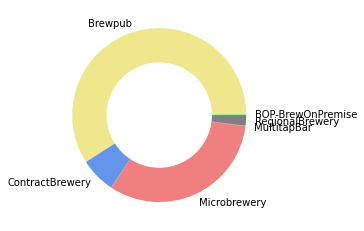

In [13]:
counts = newdata['type'].value_counts()
size = [counts[var_cat] for var_cat in newlabels]
circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(size, labels=newlabels, colors=['lightgreen','khaki','cornflowerblue','lightcoral','palevioletred','grey'])
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [14]:
(size/np.sum(size))*100

array([ 0.26726058, 58.79732739,  6.63697105, 32.24944321,  0.08908686,
        1.95991091])

The majority of breweries are Brewpubs (58.8%), followed by Microbreweries (32.25%) and Contract Breweries (6.64%). The rest of brewery types amount to 2,31% of the breweries in the US.

In [15]:
newdata['state'].describe()

count           2245
unique            51
top       california
freq             280
Name: state, dtype: object

In [16]:
freq = newdata.groupby(newdata['state']).size()
freq.sort_values(ascending = False) 

state
california        280
colorado          166
oregon            146
washington        133
pennsylvania      100
new-york           98
michigan           88
florida            82
texas              77
wisconsin          73
illinois           68
massachusetts      64
ohio               56
north-carolina     56
georgia            45
maryland           41
maine              41
new-jersey         40
minnesota          38
virginia           38
new-mexico         36
arizona            33
south-carolina     31
montana            31
indiana            28
vermont            27
idaho              25
kansas             24
tennessee          24
missouri           21
utah               20
nevada             18
new-hampshire      17
nebraska           15
oklahoma           15
louisiana          14
alaska             14
delaware           14
iowa               13
rhode-island       12
connecticut        11
kentucky           10
hawaii             10
south-dakota        9
washington-dc       9
wyom

The above table shows the different US states and ther amount of breweries sorted in descending order. California is the state with the largest amount of breweries whereas Puerto Rico is the state with the fewest breweries.

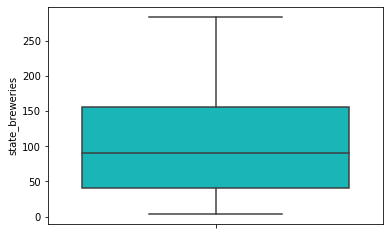

In [17]:
sns.boxplot(y=newdata['state_breweries'], color='darkturquoise');
plt.show()

In [18]:
newdata['state_breweries'].describe()

count    2245.000000
mean      107.340757
std        83.236649
min         3.000000
25%        41.000000
50%        90.000000
75%       156.000000
max       284.000000
Name: state_breweries, dtype: float64

Looking at the boxplot and the summary above, we can state that the average number of breweries across states is, approximately, 107. 

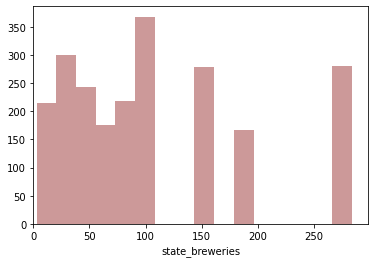

In [19]:
sns.distplot(newdata['state_breweries'], kde = None, color = 'maroon')
plt.xlim(0, None);

As we could already tell from the boxplot, the histogram above shows that most of the states have fewer than 110 breweries.

In [20]:
data_bop = newdata[newdata.type == 'BOP-BrewOnPremise']
data_bop.shape

(6, 6)

In [21]:
freq_bop = data_bop.groupby(newdata['state']).size()
freq_bop.sort_values(ascending = False)

state
california      2
virginia        1
pennsylvania    1
oregon          1
illinois        1
dtype: int64

BOP's (Brew On Premise) can only be found in California, Virgina, Pennsylvania, Oregon and Illinois.

In [22]:
data_brewpub = newdata[newdata.type == 'Brewpub']
data_brewpub.shape

(1320, 6)

In [23]:
freq_brewpub = data_brewpub.groupby(newdata['state']).size()
freq_brewpub.sort_values(ascending = False)

state
california        182
oregon            116
colorado           92
washington         74
pennsylvania       61
florida            53
michigan           49
new-york           48
illinois           42
texas              41
wisconsin          40
ohio               31
massachusetts      29
maryland           25
virginia           25
georgia            25
new-mexico         24
maine              23
north-carolina     23
minnesota          22
south-carolina     21
new-jersey         21
arizona            20
indiana            19
tennessee          18
kansas             17
utah               16
nevada             14
vermont            12
idaho              12
nebraska           11
missouri           10
iowa               10
new-hampshire       9
delaware            7
montana             7
connecticut         7
oklahoma            7
arkansas            6
wyoming             6
south-dakota        6
washington-dc       6
kentucky            5
alaska              5
hawaii              4
loui

Brewpubs, as we have already seen, are the most popular kind of breweries. Californa, Oregon and Colorado, in this order, are the three states with the largest number of Brewpubs. Alabama and Puerto Rico are last in this list.

In [24]:
data_contract = newdata[newdata.type == 'ContractBrewery']
data_contract.shape

(149, 6)

In [25]:
freq_contract = data_contract.groupby(newdata['state']).size()
freq_contract.sort_values(ascending = False)

state
colorado          19
pennsylvania      12
california        11
new-york           9
michigan           9
illinois           8
florida            8
massachusetts      6
minnesota          6
new-jersey         5
ohio               5
georgia            5
texas              5
maryland           4
louisiana          3
washington-dc      3
wisconsin          2
alabama            2
washington         2
north-carolina     2
oklahoma           2
oregon             2
tennessee          2
new-hampshire      1
south-carolina     1
arizona            1
virginia           1
delaware           1
utah               1
hawaii             1
kansas             1
indiana            1
nevada             1
kentucky           1
north-dakota       1
new-mexico         1
missouri           1
montana            1
west-virginia      1
nebraska           1
dtype: int64

Contract breweries are, in general, not very popular. The states where more breweries can be found are Colorado, Pennsylvania and California.

In [26]:
data_microbrew = newdata[newdata.type == 'Microbrewery']
data_microbrew.shape

(724, 6)

In [27]:
freq_microbrew = data_microbrew.groupby(newdata['state']).size()
freq_microbrew.sort_values(ascending = False)

state
california        75
washington        56
colorado          53
new-york          38
north-carolina    31
texas             30
michigan          29
massachusetts     28
wisconsin         27
oregon            26
pennsylvania      23
montana           22
florida           19
maine             18
ohio              18
illinois          16
georgia           14
new-jersey        14
idaho             13
arizona           12
vermont           12
maryland          11
new-mexico        11
virginia          11
missouri          10
alaska             9
south-carolina     9
minnesota          8
rhode-island       8
indiana            8
louisiana          7
kansas             6
oklahoma           6
new-hampshire      6
hawaii             5
kentucky           4
tennessee          4
delaware           4
connecticut        4
iowa               3
nebraska           3
south-dakota       3
nevada             3
wyoming            2
alabama            2
arkansas           1
puerto-rico        1
utah   

California, Washington and Colorado are the states with a larger number of microbreweries.

In [28]:
data_multitap = newdata[newdata.type == 'MultitapBar']
data_multitap.shape

(2, 6)

In [29]:
freq_multitap = data_multitap.groupby(newdata['state']).size()
freq_multitap.sort_values(ascending = False)

state
california    2
dtype: int64

The only state with multitap bars is California, with these amounting up to two.

In [30]:
data_regional = newdata[newdata.type == 'RegionalBrewery']
data_regional.shape

(44, 6)

In [31]:
freq_regional = data_regional.groupby(newdata['state']).size()
freq_regional.sort_values(ascending = False)

state
california       8
wisconsin        4
vermont          3
new-york         3
pennsylvania     3
colorado         2
delaware         2
florida          2
utah             2
minnesota        2
ohio             2
new-hampshire    1
washington       1
michigan         1
massachusetts    1
maryland         1
illinois         1
georgia          1
oregon           1
puerto-rico      1
texas            1
montana          1
dtype: int64

California is the state with the highest quantity of regional breweries, more than doubling the amount of such breweries in the rest of states.

In [32]:
print(newdata.brewery_name.str.count('Brewery').sum())

615


A total of 615 active breweries (about 27.4%) contain 'Brewery' in their name.

In [33]:
print(newdata.brewery_name.str.count('Brewing').sum())

1086


When it comes to breweries containing 'Brewing' in their name, this is true for 1086 of them (about 48.4%).